<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Predict stock prices with LSTM in PyTorch**


This guided project is based off of the [Build a recurrent neural network using Pytorch](https://developer.ibm.com/tutorials/build-a-recurrent-neural-network-pytorch/?mhsrc=ibmsearch_a&mhq=#learning-objectives0) tutorial on [IBM Developer](https://developer.ibm.com/), authored by Dhivya Lakshminarayanan and Samaya Madhavan.


Estimated time needed: **30** minutes


In this guided project, your goal is to create a basic model that can predict a stock's value using daily Open, High, Low, and Close values. Because the stock market can be extremely volatile, there are many factors that can influence and contribute to a stock's value. This tutorial uses the following parameters for the stock data.

- **Open**: The stock's price when the market opens.
- **High**: The highest price at which a stock is trading during market hours.
- **Low**: The lowest price at which a stock is trading during market hours.
- **Close**: The stock's price when the market closes. This price is used by financial institutions as the value of a stock on a particular day because it takes into consideration all of the day's events and any fluctuations that might have occurred during the market.

The overall importance of the Close value and its use as a benchmark for a stock's daily value indicates that this value is the one to use in the prediction. To accomplish this, you can build a model that uses Long Short-Term Memory (LSTM), an RNN technique, to store and analyze large sets of time series data.


## __Table of contents__

1. [Introduction](#Introduction)
   1. [Recurrent neural network](#Recurrent-neural-network)
   2. [Long Short-Term Memory](#Long-Short-Term-Memory)
2. [Objectives](#Objectives)
3. [Setup](#Setup)
   1. [Installing required libraries](#Installing-Required-Libraries)
   2. [Importing required libraries](#Importing-Required-Libraries)
4. [Read and load the data](#Read-and-load-the-data)
5. [Scale the data](#Scale-the-data)
6. [Create test and training sets](#Create-test-and-training-sets)
7. [Define the LSTM and forward method](#Define-the-LSTM-and-forward-method)
8. [Train the model](#Train-the-model)
9. [Evaluate the model](#Evaluate-the-model)
10. [Exercises](#Exercises)


## Introduction
### Recurrent neural network
*<strong>Recurrent neural networks</strong>*, or RNNs, are widely used in a variety of mediums. RNNs leverage sequential data to make predictions. **Sequential memory** makes it easier for the neural network to recognize patterns and replicate the input. To achieve learning through sequential memory, a **feedforward neural network** with looping mechanisms is implemented. 

There are *three* types of layers: **input, hidden, and output**. There are loops that pass previous information forward, allowing the model to *sequentially* store and learn the data. The complexity of a hidden state is based on how much “historic” information is being stored, it is a representation of all previous steps. When training a model, once there is a prediction from a given output, a **loss function** is used to determine the error between the predicted output and real output. The model is trained through back propagation. The weight of each node in the neural network is adjusted with their corresponding gradient that is calculated during **back propagation**. 


The advantage of using sequential data to successfully predict certain outcomes is especially relevant when analyzing **time series data**. 


### [Long Short-Term Memory](https://ieeexplore.ieee.org/abstract/document/6795963)

Recurrent backpropagation can be very time-consuming due to insufficient and decaying error backflow. To solve this issue, a type of RNN called **Long Short-Term Memory (LSTM)** is used. [**LSTMs**](https://developer.ibm.com/tutorials/iot-deep-learning-anomaly-detection-1/) are able to keep track of long term dependencies by using gradients to modify the model, rather than backpropogations. These attributes are especially advantageous when examining **time series data**. The more historical data there is, the better the model can train, producing the most accurate outputs. 

An LSTM has an internal state variable that is modified based on weights and biases through operation gates. Traditionally, an LSTM is comprised of three operation gates: the forget gate, input gate, and output gate. The architecture of long-short term memory is dependent on $tanh$ and $sigmoid$ functions implemented in the network. The $tanh$ function ensures that the values in the network remain between -1 and 1 while the $sigmoid$ function regulates whether data should be remembered or forgotten. Furthermore, 

The mathematical representations of each gate are as follows:

<strong>Forget Gate</strong>: $$f_t = \sigma(w_f*[h_{t-1},x_t] + b_f)$$

<strong>Input Gate</strong>: $$i_t = \sigma(w_f*[h_{t-1},x_t] + b_i)$$

<strong>Output Gate</strong>: $$O_t = \sigma(w_f*[h_{t-1},x_t] + b_o)$$

Where:  
* $w_f$ = weight matrix between forget and input gate
* $h_{t-1}$ = previous hidden state
* $x_t$ = input
* $b_f$ = connection bias at forget gate 
* $b_i$ = connection bias at input gate 
* $b_o$ = connection bias at output gate 
* $\sigma$ = the sigmoid function

Each gate modifies the input in a different way. The forget gate determines what data is relevant to keep and what information can be "forgotten". The input gate analyzes what information needs to be added to the current step, and the output gate finalizes the proceeding hidden state. Each of these gates allows for sequential data to be efficiently stored and analyzed, allowing for an accurate predictive model to be developed. 

[***Source:** *S. Hochreiter and J. Schmidhuber, "Long Short-Term Memory," in Neural Computation, vol. 9, no. 8, pp. 1735-1780, 15 Nov. 1997, doi: 10.1162/neco.1997.9.8.1735.*](https://ieeexplore.ieee.org/abstract/document/6795963)


## Objectives

After completing this lab, you are able to:

 - Build an LSTM using PyTorch.
 - Train an LSTM model and evaluate the model with metrics such as mean squared error.


----


## Setup


For this lab, you use the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`pytorch`](https://pytorch.org/docs/stable/torch.html) to train and build the layers of neural networks.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You must run the following cell__ to install them:


In [1]:
%%capture
!pip install torch=="2.3.0"
!pip install pandas=="2.2.2"
!pip install matplotlib=="3.8.4"
!pip install scikit-learn=="1.4.2"

### Importing required libraries

*This step could take **several minutes**, please be patient.*


In [8]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Read and load the data

We will be loading a dataset on stock prices using daily Open, High, Low, and Close values.


In [12]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/g5XM0-gTrOquyZcBxcJAfw/StockData.csv")
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [13]:
df.head()

,Date,Open,High,Low,Close
0,2018-03-27,173.68,175.15,166.92,168.340
1,2018-03-26,168.07,173.10,166.44,172.770
2,2018-03-23,168.39,169.92,164.94,164.940
3,2018-03-22,170.00,172.68,168.60,168.845
4,2018-03-21,175.04,175.09,171.26,171.270


First, let us examine the data.


In [15]:
stock_data = df
# Convert the date column into a Datetime object:
stock_data['Date'] = pd.to_datetime(df.Date)
stock_data[['Open', 'High', 'Low', 'Close']] = stock_data[['Open', 'High', 'Low', 'Close']].astype(np.float16)
print("Information about the dataset", end = "\n")
print(stock_data.info())
print(stock_data.describe())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9400 non-null   datetime64[ns]
 1   Open    9400 non-null   float16       
 2   High    9400 non-null   float16       
 3   Low     9400 non-null   float16       
 4   Close   9400 non-null   float16       
dtypes: datetime64[ns](1), float16(4)
memory usage: 147.0 KB
None
                                Date         Open         High          Low  \
count                           9400  9400.000000  9400.000000  9400.000000   
mean   1999-07-27 09:59:44.680851072          inf          inf          inf   
min              1980-12-12 00:00:00    11.117188    11.117188    11.000000   
25%              1990-04-01 06:00:00    27.000000    27.500000    26.500000   
50%              1999-07-20 12:00:00    43.750000    44.500000    43.000000   
75%             

/opt/conda/lib/python3.12/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/lib/python3.12/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/lib/python3.12/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/lib/python3.12/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


We can see that there are a total of 5 columns, the columns we want to input into the model are the last four columns: index 1-4.


By printing the first and last 5 elements, we can see that the data is in inverse order. The most recent data stored at the beginning of the set and the oldest data is at the end. For our model, we need to input the data from oldest to most recent. The Pandas method "sort_values" can be used to sort the data in chronological order.


In [16]:
print("First five elements in the dataset", end = "\n")
print(stock_data.head(5))
print("Last five elements in the dataset", end = "\n")
print(stock_data.tail(5))

First five elements in the dataset
        Date     Open     High      Low    Close
0 2018-03-27  173.625  175.125  166.875  168.375
1 2018-03-26  168.125  173.125  166.500  172.750
2 2018-03-23  168.375  169.875  165.000  165.000
3 2018-03-22  170.000  172.625  168.625  168.875
4 2018-03-21  175.000  175.125  171.250  171.250
Last five elements in the dataset
           Date    Open    High     Low   Close
9395 1980-12-18  26.625  26.750  26.625  26.625
9396 1980-12-17  25.875  26.000  25.875  25.875
9397 1980-12-16  25.375  25.375  25.250  25.250
9398 1980-12-15  27.375  27.375  27.250  27.250
9399 1980-12-12  28.750  28.875  28.750  28.750


/opt/conda/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/opt/conda/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


After applying the "sort_values" method, we can use the "head" method to print the first five data points. Our data is now in the correct order.  


In [17]:
stock_data = stock_data.sort_values(by="Date")
print(stock_data.head())

           Date    Open    High     Low   Close
9399 1980-12-12  28.750  28.875  28.750  28.750
9398 1980-12-15  27.375  27.375  27.250  27.250
9397 1980-12-16  25.375  25.375  25.250  25.250
9396 1980-12-17  25.875  26.000  25.875  25.875
9395 1980-12-18  26.625  26.750  26.625  26.625


/opt/conda/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


To create the multivariate model, we can create an array containing only the variables we want to input. We no longer need the date or index column as the data has already been ordered.


## Scale the data


In [18]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

        High     Low    Open   Close
9399  28.875  28.750  28.750  28.750
9398  27.375  27.250  27.375  27.250
9397  25.375  25.250  25.375  25.250
9396  26.000  25.875  25.875  25.875
9395  26.750  26.625  26.625  26.625


/opt/conda/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


After we have isolated the target variables, the next step is to normalize the values by representing them as a value between -1 and 1. This allows us to make the data uniform. This means, irrespective of the range it falls under, each data point will have the same impact on the model. 


Note that normally, we should not expose the test data to the scaler. However, the scaler is just a min max scaler, so the only pertinent information that is leaked are the highest and lowest stock prices. In this case, we can assume that it has negligible effect.


In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.949  -0.9487 -0.949  -0.949 ]
 [-0.953  -0.953  -0.953  -0.953 ]
 [-0.959  -0.959  -0.959  -0.959 ]
 [-0.957  -0.957  -0.9575 -0.9575]
 [-0.955  -0.955  -0.955  -0.955 ]]


## Create test and training sets


Below, we have defined our train window as 7.


In [20]:
train_window = 7
import numpy as np
def create_in_out_sequences(price, tw):
    inout_seq = []
    L = len(price)
    print('Length = ', L)
    
    for i in range(L-tw):
        data_seq = price[i:i+tw]
        data_label = price[i+tw:i+tw+1][0][3]
        inout_seq.append((data_seq ,data_label))
    
    data = inout_seq;
    print('size of data : ', len(data))
    
    test_set_size = int(.2 * len(data))
    train_set_size = len(data) - (test_set_size);
    print('size of test : ', test_set_size)
    print('size of train : ', train_set_size)
    
    train = data[:train_set_size]
    test = data[train_set_size:]
    train = train[:-(tw-1)]
    return train, test
    
train,test = create_in_out_sequences(price, train_window)

Length =  9400
size of data :  9393
size of test :  1878
size of train :  7515


The `create_in_out_sequences` method creates labels for the dataset and isolates the datapoints we are inputting into the model, taking into account the training and test size and returns the training and test sets.


Let us print the first five elements of the test data and the last five elements of the train set to confirm its formatting.


In [21]:
print(test[0])
print(train[-1])

(array([[-0.1914, -0.2334, -0.1885, -0.2026],
       [-0.1973, -0.2017, -0.2017, -0.2012],
       [-0.1963, -0.2153, -0.1968, -0.2114],
       [-0.2065, -0.2153, -0.2119, -0.2148],
       [-0.2168, -0.2256, -0.2183, -0.2256],
       [-0.1978, -0.2139, -0.2168, -0.1958],
       [-0.1909, -0.2036, -0.1953, -0.1953]], dtype=float16), np.float16(-0.1953))
(array([[-0.231 , -0.2368, -0.229 , -0.2358],
       [-0.2144, -0.2314, -0.2344, -0.2129],
       [-0.2046, -0.2109, -0.2119, -0.2114],
       [-0.2021, -0.2114, -0.2148, -0.1997],
       [-0.1885, -0.2017, -0.2046, -0.1958],
       [-0.1865, -0.1885, -0.188 , -0.1865],
       [-0.1826, -0.187 , -0.1821, -0.1895]], dtype=float16), np.float16(-0.2026))


We can see that the data type of the train data is an array, and the data is all normalized. 


## Define the LSTM and forward method


This is the LSTM method. The number of inputs included in the model is 4 to represent the Open, High, Low, and Close values that we are feeding into the model.


In [42]:
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                       torch.zeros(1,1,self.hidden_layer_size),
                      )
        lstm_out, hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

- `self.hidden_layer_size` stores the size of the hidden layer, in this case, defaulted to 100.

- `self.lstm` initializes an LSTM layer. The LSTM takes input sequences of size input_size and outputs sequences of size hidden_layer_size.

- `self.linear` initializes a fully connected linear layer. It maps the LSTM output to the desired output_size.

- The `forward` method takes an input sequence and produces a prediction.


In [23]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

We must define an `LSTM()` method object, the loss function, and optimizer so that we can use it when we train the model. 


## Train the model


Now that all the necessary parameters have been defined, we can use the `LSTM()` and `create_in_out_sequence()` to train the model. We are training this model to 5 epochs. 

_Note: This cell will take a long time to run._


In [25]:
from tqdm.notebook import tqdm
        
epochs = 5
for i in tqdm(range(epochs)):
    epoch_loss = 0
    for seq, labels in tqdm(train):
        seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
        labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)

        optimizer.zero_grad()

        y_pred = model(seq)
        
        labels = labels.view(1)
        
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

        epoch_loss += single_loss.item()

    average_loss = epoch_loss / len(train)
    print(f'epoch: {i:3} loss: {average_loss:.10f}')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   0 loss: 0.0007925719


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   1 loss: 0.0006532260


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   2 loss: 0.0005308815


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   3 loss: 0.0004555983


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   4 loss: 0.0004060225


The following method allows us to predict the values using the trained model. 


In [26]:
model.eval()
actual = []
pred = []

for seq, labels in test:
    seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
    labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
    actual.append(labels.item())
    with torch.no_grad():
        pred.append(model(seq).item())

actual = np.array(actual)
pred = np.array(pred)

Next, our aim is to convert the predicted and actual data into tensors. 


In [27]:
pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

We can print the data to confirm that this it is formatted with the correct data type. 


In [28]:
print(pred)
print(actual)

tensor([-0.1759, -0.1754, -0.1638,  ..., -0.4181, -0.4214, -0.4180])
tensor([-0.1953, -0.1816, -0.1777,  ..., -0.5547, -0.5322, -0.5449])


There are 20 individual tensors in both the predicted and actual sets. As we recall, previously, we defined the variable "test_set_size" as 20 in the `create_inout_sequence` method. These values represent the predicted and actual Close Values for the last (most recent) 20 days.  


Finally, to better understand and analyze the accuracy of the model's predictive values, we need to convert the normalized values into thier scalar form. 


In [36]:
import numpy as np
pred_new = scaler.inverse_transform(np.c_[np.zeros(pred.size()),np.zeros(pred.size()),np.zeros(pred.size()),np.array(pred)])
print(pred_new[:,3])

[295.94789778 296.11220748 300.13774102 ... 212.25731295 211.10423533
 212.2811882 ]


/tmp/ipykernel_300/2039783107.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pred_new = scaler.inverse_transform(np.c_[np.zeros(pred.size()),np.zeros(pred.size()),np.zeros(pred.size()),np.array(pred)])


In [37]:
actual_new = scaler.inverse_transform(np.c_[np.zeros(actual.size()),np.zeros(actual.size()),np.zeros(actual.size()),np.array(actual)])
print(actual_new[:,3])

[289.24456163 293.96967699 295.31970995 ... 165.04152933 172.80421885
 168.41661173]


/tmp/ipykernel_300/3258590189.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  actual_new = scaler.inverse_transform(np.c_[np.zeros(actual.size()),np.zeros(actual.size()),np.zeros(actual.size()),np.array(actual)])


## Evaluate the model


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_new, pred_new)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mean_squared_error(actual_new, pred_new))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 27.52732207722206
Root Mean Squared Error (RMSE): 114.15566939765739


The model did a good job of predicting the Close Value of the stock. We can represent these values visually to see how close they are.


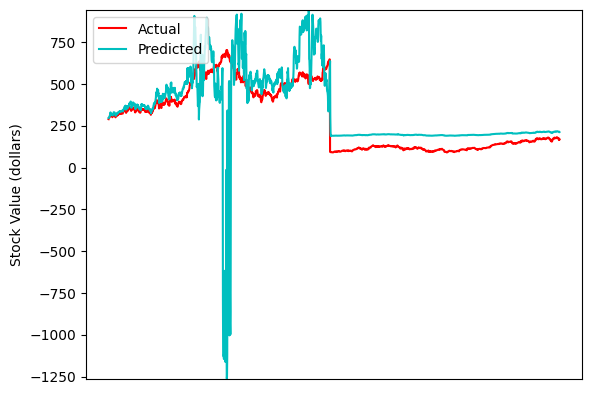

In [39]:
fig, ax = plt.subplots()

ax.plot(actual_new[:,3], 'r-', label='Actual')
ax.plot(pred_new[:,3], 'c-', label='Predicted')

ax.set_ylabel('Stock Value (dollars)')

ax.set_ylim(min(min(actual_new[:,3]), min(pred_new[:,3])) - 5, max(max(actual_new[:,3]), max(pred_new[:,3])) + 5)
plt.xticks([])

ax.legend(loc='upper left')

plt.show()

We can also plot the difference between the Actual and Predicted value. 


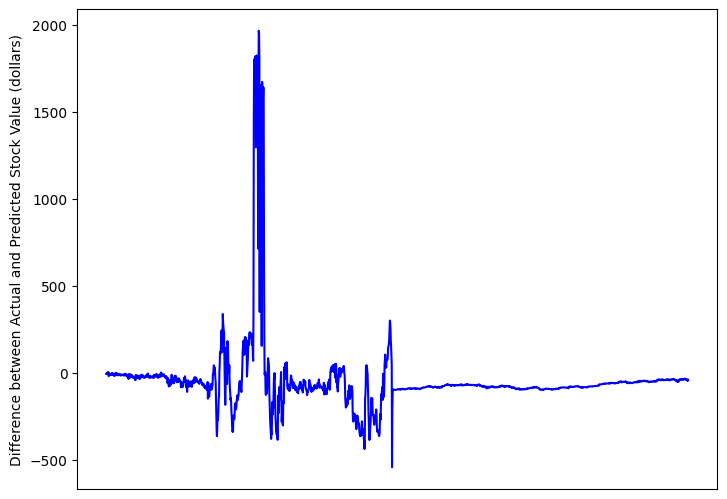

In [40]:
difference = actual_new - pred_new
fig = plt.figure()
diffGraph = fig.add_axes([0,0,1,1])
diffGraph.plot(difference[:, 3], 'b')
diffGraph.set_ylabel('Difference between Actual and Predicted Stock Value (dollars)')
plt.xticks([])
plt.show()

From this plot, the predicted value often seems to be lower than the actual value.


# Exercises

For the following exercises, we will use a dataset for gold stock prices. This dataset was taken from [Kaggle](https://kaggle.com/datasets/sahilwagh/gold-stock-prices).


### Exercise 1 - After loading the dataset into a DataFrame, create a DataFrame that contains only the 'Close', 'Open', 'High', 'Low' values


In [41]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/E92l5dmaQtjIeBdKEEtgUA/goldstock.csv')
df = df.sort_values(by="Date")
gold_price = df[['Close', 'Open', 'High', 'Low']]
gold_price = scaler.fit_transform(gold_price.values)

<details>
    <summary>Click here for solution</summary>

```python
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/E92l5dmaQtjIeBdKEEtgUA/goldstock.csv')
df = df.sort_values(by="Date")
gold_price = df[['Close', 'Open', 'High', 'Low']]
gold_price = scaler.fit_transform(gold_price.values)
```

</details>


### Exercise 2 - Get train and test sets using the `create_in_out_sequences` method


In [43]:
# TODO
train_window = 7
gold_train, gold_test = create_in_out_sequences(gold_price, train_window)

Length =  2511
size of data :  2504
size of test :  500
size of train :  2004


<details>
    <summary>Click here for solution</summary>
    
```python
train_window = 7
gold_train, gold_test = create_in_out_sequences(gold_price, train_window)
```
</details>


Here, we are training on 5 epochs:

**Note**: Run the solution for exercise 2 before running the following cell, this will take some time:


In [44]:
epochs = 5
for i in tqdm(range(epochs)):
    epoch_loss = 0
    for seq, labels in tqdm(train):
        seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
        labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)

        optimizer.zero_grad()

        y_pred = model(seq)
        
        labels = labels.view(1)
        
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

        epoch_loss += single_loss.item()

    average_loss = epoch_loss / len(train)
    print(f'epoch: {i:3} loss: {average_loss:.10f}')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   0 loss: 0.0003692009


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   1 loss: 0.0003381161


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   2 loss: 0.0003089268


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   3 loss: 0.0002857932


  0%|          | 0/7509 [00:00<?, ?it/s]

epoch:   4 loss: 0.0002710564


In [46]:
model.eval()
actual = []
pred = []

for seq, labels in test:
    seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
    labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
    actual.append(labels.item())
    with torch.no_grad():
        pred.append(model(seq).item())

actual = np.array(actual)
pred = np.array(pred)

### Exercise 3 - Convert `gold_pred` and `gold_actual` into torch tensors and print the RMSE


In [48]:
# TODO
gold_pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
gold_actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

gold_pred_new = scaler.inverse_transform(np.c_[np.zeros(gold_pred.size()),np.zeros(gold_pred.size()),np.zeros(gold_pred.size()),np.array(gold_pred)])
gold_actual_new = scaler.inverse_transform(np.c_[np.zeros(gold_actual.size()),np.zeros(gold_actual.size()),np.zeros(gold_actual.size()),np.array(gold_actual)])

rmse = np.sqrt(mean_squared_error(gold_actual_new, gold_pred_new))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 151.78224039881115


/tmp/ipykernel_300/1464986972.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  gold_pred_new = scaler.inverse_transform(np.c_[np.zeros(gold_pred.size()),np.zeros(gold_pred.size()),np.zeros(gold_pred.size()),np.array(gold_pred)])
/tmp/ipykernel_300/1464986972.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  gold_actual_new = scaler.inverse_transform(np.c_[np.zeros(gold_actual.size()),np.zeros(gold_actual.size()),np.zeros(gold_actual.size()),np.array(gold_actual)])


<details>
    <summary>Click here for solution</summary>
    
```python
gold_pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
gold_actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

gold_pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(gold_pred)])
gold_actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(gold_actual)])

rmse = np.sqrt(mean_squared_error(gold_actual_new, gold_pred_new))
print("Root Mean Squared Error (RMSE):", rmse)
```
</details>


## Authors


[Kang Wang](https://author.skills.network/instructors/kang_wang)

[Lucy Xu](https://author.skills.network/instructors/lucy_xu)


### Other Contributors


[Ricky Shi](https://author.skills.network/instructors/ricky_shi)

[Wojciech "Victor" Fulmyk](https://www.linkedin.com/in/wfulmyk)


Copyright © 2024 IBM Corporation. All rights reserved.
